In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

In [3]:
df = pd.read_csv(url)

In [5]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,851,857,872,877,891,898,898,910,925,938
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5422,5549,5748,5894,6067,6218,6297,6453,6631,6717
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,684,692,694,698,733,735,738,741,741,744
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,18,18,18,18,18,18,18,21,24,24


In [6]:
drop_col = ["Province/State","Lat","Long"]

In [10]:
df = df.drop(drop_col,axis=1)

In [14]:
df_new = df.groupby("Country/Region",as_index=False).agg(sum)

In [15]:
df_new

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875
1,Albania,0,0,0,0,0,0,0,0,0,...,851,857,872,877,891,898,898,910,925,938
2,Algeria,0,0,0,0,0,0,0,0,0,...,5422,5549,5748,5894,6067,6218,6297,6453,6631,6717
3,Andorra,0,0,0,0,0,0,0,0,0,...,684,692,694,698,733,735,738,741,741,744
4,Angola,0,0,0,0,0,0,0,0,0,...,18,18,18,18,18,18,18,21,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,368,368,372,372,372,372,377,377,400,403
184,Western Sahara,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
185,Yemen,0,0,0,0,0,0,0,0,0,...,11,13,14,14,15,17,17,23,23,23
186,Zambia,0,0,0,0,0,0,0,0,0,...,779,779,779,912,912,912,912,912,912,912


# plotting recovered cases for a particular country

In [34]:
def plot_for_recovered(country_name):
    country_name = country_name.lower()
    df_new_one = df_new.loc[df_new["Country/Region"].str.lower() == country_name].drop("Country/Region",axis=1).T
    df_new_one.reset_index(inplace=True)
    df_new_one.columns = ["Dates","Total_Recovered"]
    df_new_one["Dates"] = pd.to_datetime(df_new_one["Dates"])
    df_new_one.plot(kind="line",x="Dates",y="Total_Recovered")
    plt.ylabel("Total_Recovered")
    plt.title("Recovery in {}".format(country_name).upper())
    plt.show()

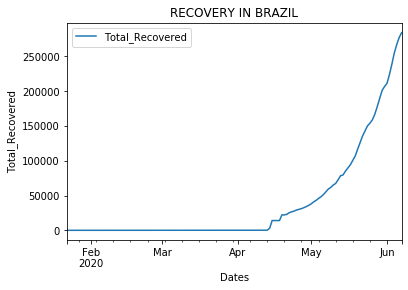

In [39]:
plot_for_recovered("brazil")


# Top 10 countries which are recovering very fastly

In [51]:
def plot_for_recovered():
    df_new_recovered = df_new[["Country/Region","6/7/20"]].sort_values("6/7/20",ascending=False).head(10)
    df_new_recovered.plot(kind="bar",x="Country/Region",y="6/7/20")
    plt.show()

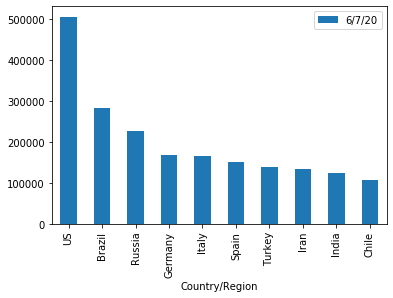

In [52]:
plot_for_recovered()

# Plotting graph for daily recovery of a particular country

In [58]:
df_tr = df_new.set_index("Country/Region").T

In [62]:
df_diff = df_tr.diff()

In [68]:
df_diff.replace(np.nan,0.0)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/3/20,72.0,7.0,151.0,2.0,0.0,0.0,187.0,27.0,12.0,43.0,...,-12.0,7.0,106.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0
6/4/20,63.0,0.0,79.0,3.0,0.0,0.0,97.0,14.0,35.0,45.0,...,7.0,11.0,73.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0
6/5/20,177.0,12.0,156.0,3.0,3.0,0.0,95.0,45.0,5.0,25.0,...,9.0,12.0,160.0,0.0,5.0,0.0,0.0,6.0,0.0,2.0
6/6/20,68.0,15.0,178.0,0.0,3.0,0.0,92.0,207.0,15.0,47.0,...,2.0,5.0,21.0,51.0,0.0,23.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Daily Recovery')

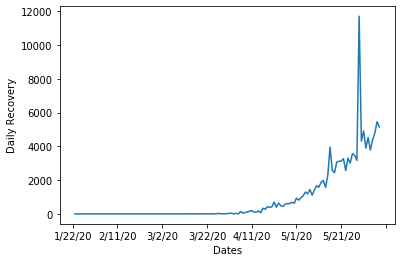

In [71]:
df_diff["India"].plot(kind='line')
plt.xlabel("Dates")
plt.ylabel("Daily Recovery")